## 재무 데이터 핸들링

In [3]:



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import os

from dateutil.relativedelta import relativedelta

plt.style.use('seaborn')

FONT_NAME = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=FONT_NAME)


# print(os.getcwd())

folder_dir = 'C:/data\실습데이터'
DATA_FILE = "KRX300_FIN_DATA_2023.xlsx"

data_wb = pd.ExcelFile(folder_dir + "/" + DATA_FILE)

find_ts = data_wb.parse("재무", index_col=3)  # 인덱스는 연도

print(find_ts.head(16))


       Symbol  Name  결산월           총자산           총부채           총자본  \
회계연도                                                                 
2007  A005930  삼성전자   12  9.337514e+10  3.740323e+10  5.597191e+10   
2008  A005930  삼성전자   12  1.053006e+11  4.237670e+10  6.292395e+10   
2009  A005930  삼성전자   12  1.121798e+11  3.913459e+10  7.304520e+10   
2010  A005930  삼성전자   12  1.342887e+11  4.493965e+10  8.934909e+10   
2011  A005930  삼성전자   12  1.558003e+11  5.448663e+10  1.013136e+11   
2012  A005930  삼성전자   12  1.810716e+11  5.959136e+10  1.214802e+11   
2013  A005930  삼성전자   12  2.140750e+11  6.405901e+10  1.500160e+11   
2014  A005930  삼성전자   12  2.304230e+11  6.233477e+10  1.680882e+11   
2015  A005930  삼성전자   12  2.421795e+11  6.311972e+10  1.790598e+11   
2016  A005930  삼성전자   12  2.621743e+11  6.921129e+10  1.929630e+11   
2017  A005930  삼성전자   12  3.017521e+11  8.726066e+10  2.144914e+11   
2018  A005930  삼성전자   12  3.393572e+11  9.160407e+10  2.477532e+11   
2019  A005930  삼성전자 

1.복수 재무지표 순위

In [19]:
ror=find_ts.iloc[:,3:]/find_ts.iloc[:,3:].shift(1)-1    # 전년비 증감률

Name=find_ts['Name']

ror = pd.concat([Name,ror],axis=1)

print(ror.head(5))



      Name       총자산       총부채       총자본       매출액      영업이익     당기순이익  \
회계연도                                                                     
2007  삼성전자       NaN       NaN       NaN       NaN       NaN       NaN   
2008  삼성전자  0.127716  0.132969  0.124206  0.231317 -0.327798 -0.256566   
2009  삼성전자  0.065329 -0.076507  0.160849  0.123908  0.820335  0.657079   
2010  삼성전자  0.197085  0.148336  0.223203  0.134288  0.513754  0.654264   
2011  삼성전자  0.160189  0.212440  0.133908  0.067073 -0.058765 -0.147864   

          현금흐름       EPS       BPS       SPS      CFPS  
회계연도                                                    
2007       NaN       NaN       NaN       NaN       NaN  
2008 -0.018659 -0.255328  0.102000  0.231316 -0.018661  
2009  0.325729  0.732127  0.163258  0.123908  0.325729  
2010  0.313076  0.650619  0.197278  0.134289  0.313076  
2011 -0.008025 -0.152946  0.120817  0.067072 -0.008024  


In [20]:
print (ror['매출액'])

회계연도
2007         NaN
2008    0.231317
2009    0.123908
2010    0.134288
2011    0.067073
          ...   
2018    0.110818
2019    0.059197
2020    0.100146
2021    0.298940
2022    0.675472
Name: 매출액, Length: 4784, dtype: float64


<AxesSubplot:xlabel='회계연도'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


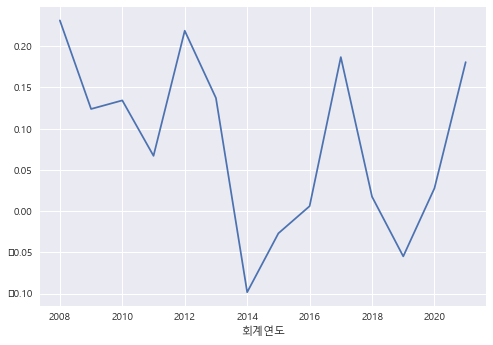

In [21]:
#  삼성전자 EPS 연간 상승률

EPS= ror[ror['Name']=='삼성전자']['매출액'][:-1]    

EPS.plot()

In [43]:
# 기간설정 

rt=ror[(ror.index >= 2020) & (ror.index <= 2022)]
print(rt)

# rt.index = pd.to_datetime(rt.index, format = '%Y')
# rt.loc['2020':'2022']


        Name       총자산       총부채       총자본       매출액       영업이익       당기순이익  \
회계연도                                                                          
2020    삼성전자  0.072813  0.140534  0.049709  0.027804   0.296212    0.214775   
2021    삼성전자  0.127924  0.189989  0.104918  0.180729   0.434518    0.511198   
2022    삼성전자  0.051107 -0.230414  0.163495  0.080923  -0.159919    0.394579   
2020  SK하이닉스  0.090815  0.112768  0.082886  0.181903   0.843433    1.368705   
2021  SK하이닉스  0.353679  0.772951  0.198076  0.347876   1.475817    1.020669   
...      ...       ...       ...       ...       ...        ...         ...   
2021     메지온  0.109872  0.123587  0.105330 -0.069159   1.230596   -0.016388   
2022     메지온 -0.356382  0.314114 -0.582122  0.152785   0.388969    1.668433   
2020   한국비엔씨  0.363387  0.390872  0.341439  0.100146  -0.594162   -1.263690   
2021   한국비엔씨  0.992124  1.744069  0.369534  0.298940 -12.852577 -124.762617   
2022   한국비엔씨  0.726057 -0.495256  2.752176  0.675472

<AxesSubplot:xlabel='Name'>

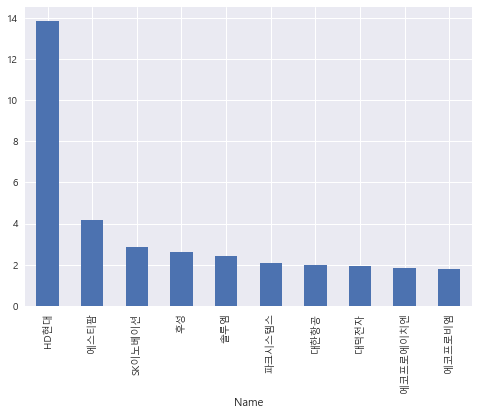

In [60]:
#  특정 연도 선택

finy=ror[(ror.index ==2022) ]     

fn=finy[(finy['매출액']> 0.3) & (finy['당기순이익']>0.2)][['Name','매출액','당기순이익']]

#  증가율로 컬럼명 변경

fnn=fn.rename({'매출액': '매출액증가율', '당기순이익': '당기순이익증가율'}, axis=1)        

# 랭킹 상위 10위  막대그래프로 그리기

ps = fnn.sort_values(ascending=False, by='당기순이익증가율')[:10]    

pss=ps.set_index('Name')   # 인덱스 변경 

pss['당기순이익증가율'].plot.bar()

 



In [62]:
# 특정 재무지표에 따라 순위 매겨  재무지표출력


pt = finy.sort_values(ascending=False, by='영업이익')[:10][['Name','매출액','당기순이익','영업이익']] 
pt

,Name,매출액,당기순이익,영업이익
회계연도,,,,
2022,화승엔터프라이즈,0.452719,0.100983,6.437725
2022,에코프로,2.749351,-0.208104,6.134114
2022,아시아나항공,0.430205,-1.051326,5.424256
2022,위지윅스튜디오,0.549209,0.488131,5.299607
2022,자이언트스텝,0.225074,2.651509,5.140746
2022,엘앤에프,3.004378,-3.414081,5.018253
2022,한국전력,0.174446,3.683871,4.585420
2022,SK디스커버리,0.317914,0.961248,3.870864
2022,SK가스,0.241997,0.031339,2.702468


In [63]:
#  쿼리방식으로 조건 추출  
    
ff=finy.query('매출액>0.5 & 당기순이익>0.5')[['Name','당기순이익','매출액']]     
ff.sort_values(ascending=False, by='당기순이익')


,Name,당기순이익,매출액
회계연도,,,
2022,HD현대,13.842722,1.146095
2022,에스티팜,4.186170,0.505184
2022,SK이노베이션,2.879510,0.665982
2022,후성,2.594612,0.601452
2022,대한항공,1.988176,0.563310
2022,에코프로에이치엔,1.817552,1.400740
2022,에코프로비엠,1.788159,2.606290
2022,삼성바이오로직스,1.027636,0.914083
2022,F&F,0.960763,0.660798


In [67]:
fina3=ror.rolling(3).mean()   

C:\Users\jwkim\AppData\Local\Temp\ipykernel_22204\485092696.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name'], dtype='object')
  fina3=ror.rolling(3).mean()


In [68]:
fina3.head()

,총자산,총부채,총자본,매출액,영업이익,당기순이익,현금흐름,EPS,BPS,SPS,CFPS
회계연도,,,,,,,,,,,
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.130043,0.068266,0.169419,0.163171,0.335430,0.351592,0.206715,0.375806,0.154179,0.163171,0.206715
2011,0.140867,0.094756,0.172653,0.108423,0.425108,0.387826,0.210260,0.409934,0.160451,0.108423,0.210260


C:\Users\jwkim\AppData\Local\Temp\ipykernel_22204\2074209987.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Name'], dtype='object')
  fina=ror.rolling(3).mean()     #  3년 평균


<AxesSubplot:xlabel='Name'>

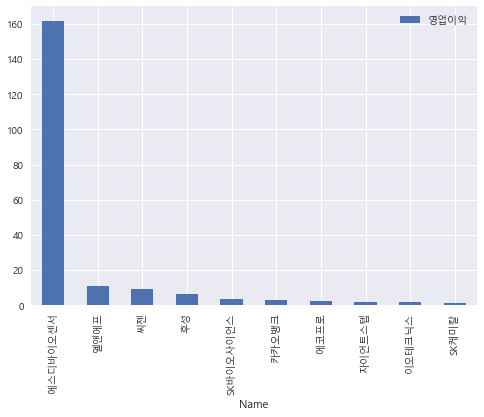

In [72]:
# 3년 평균 / 3년 추세

fina=ror.rolling(3).mean()     #  3년 평균
name=find_ts['Name']
rorm = pd.concat([name,fina],axis=1)
rorm=rorm[rorm.index==2022]   # 지정한 연도만 추출

#  조건 추출 

ra=rorm.query('매출액>0.2 & 영업이익>0.1')[['Name','영업이익','매출액']]  
ra=ra.sort_values(ascending=False,by ='영업이익')[:10]

raa=ra.set_index('Name')
raa[['영업이익']].plot.bar()




<AxesSubplot:xlabel='Name'>

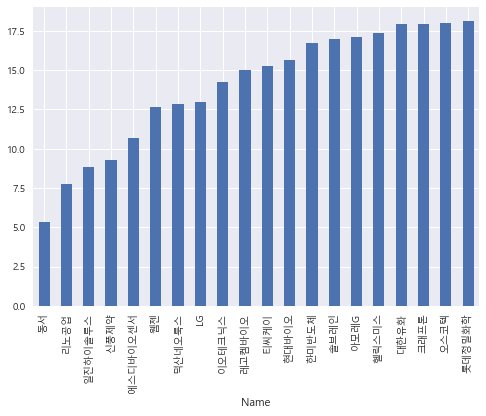

In [76]:
# 재무비율 산정 :  특정 연도 부채비율 

find_ts ['부채비율']=find_ts ['총부채']/find_ts ['총자본']*100

find_2022= find_ts [(find_ts.index ==2022)]

#  랭킹 상위 20위  막대그래프로 그리기

dratio = find_2022.sort_values(ascending=True, by='부채비율')[:20]   

debt=dratio.set_index('Name')   # 인덱스 변경 

debt['부채비율'].plot.bar()


<AxesSubplot:xlabel='Name'>

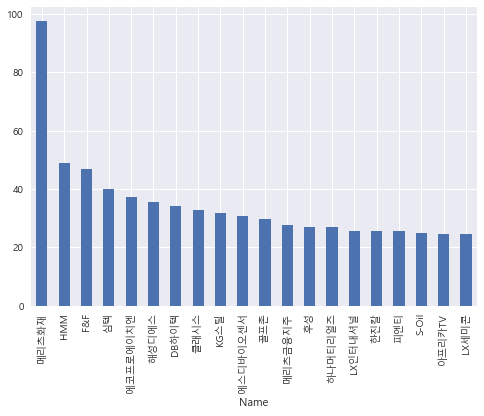

In [79]:
# 재무비율 산정 : 특정연도 자기자본이익률(ROE)

find_ts ['ROE']=find_ts ['당기순이익']/find_ts ["총자본"]*100

find_2022= find_ts [(find_ts.index ==2022)]

ratio = find_2022.sort_values(ascending=False, by='ROE')[:20]    # 랭킹 상위 10위  막대그래프로 그리기

ROE=ratio.set_index('Name')   # 인덱스 변경 

ROE['ROE'].plot.bar()

In [91]:
# 삼성전자 ROE

find_2022[find_2022.Name=='삼성전자']['ROE']



회계연도
2022    15.68827
Name: ROE, dtype: float64